Here's my assignment for week one of BrainHack school 2020. 

#### Assignment 

This assignement will be featuring two multilinear regression models based on the dataset "brainsize.csv", that includes different variables:

* Gender
* Full Scale Intelligence Quotient as FSIQ
* Verbal Intelligence Quotient as VIQ
* Performance Intellignece Quotient as PIQ
* Brain volume (voxel count) as MRI_Count
* Body weight as Weight
* Body Height as Height

The regression models will have the aim of predicting two different random_seed based variables partY and partY2. This exercise is designed to demonstrate how easily false positives or inflated prediction rates via p-hacking can be produced.

#### Create pandas dataframe from .csv file

Import needed packages

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import Ridge

Make sure path is set correctly (cvs file should be in the same folder as myanalysis.ipynb)

In [2]:
pwd

'/home/bea/bhs2020/Assignement week1'

Load brainsize.csv file as reading file

In [3]:
#load brainsize.csv file as reading file
data = pd.read_csv('brainsize.csv', sep=';', index_col=0, na_values= ".")
print(data.shape)
data.head()

(40, 7)


,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


Identify and verify type of data

In [4]:
data.dtypes

Gender        object
FSIQ           int64
VIQ            int64
PIQ            int64
Weight       float64
Height       float64
MRI_Count      int64
dtype: object

#### Assess for missing values; for this senario, removal of missing values will be adopted

In [5]:
data = data.dropna()
data.shape #verify dropna. Here 2 rows were excluded.

(38, 7)

###  Descriptive stats

In [6]:
data.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,38.000000,38.000000,38.000000,38.000000,38.000000,3.800000e+01
mean,113.552632,112.131579,111.342105,151.052632,68.421053,9.067542e+05
std,23.815391,22.939605,22.597867,23.478509,3.993790,7.256175e+04
min,77.000000,71.000000,72.000000,106.000000,62.000000,7.906190e+05
25%,90.250000,90.250000,89.250000,135.250000,66.000000,8.548115e+05
50%,116.500000,113.000000,115.000000,146.500000,68.000000,9.053990e+05
75%,135.000000,129.000000,128.000000,172.000000,70.375000,9.495405e+05
max,144.000000,150.000000,150.000000,192.000000,77.000000,1.079549e+06


### Create and add partY variable with random values

In [7]:
np.random.seed(1) # seed for the next random number.
data['partY'] = np.random.normal(loc=100, # stands for mean.
                                 scale =10, #stands for standard deviation.
                                 size = len(data)) #according to data shape (number of rows).
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY
1,Female,133,132,124,118.0,64.5,816932,116.243454
3,Male,139,123,150,143.0,73.3,1038437,93.882436
4,Male,133,129,128,172.0,68.8,965353,94.718282
5,Female,137,132,134,147.0,65.0,951545,89.270314
6,Female,99,90,110,146.0,69.0,928799,108.654076


### Comparison with other random seed variable partY2

In [8]:
np.random.seed(20)
data['partY2'] = np.random.normal(loc=100,
                                  scale =10, 
                                  size= len(data)) #accroding to shape, 38 rows
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY,partY2
1,Female,133,132,124,118.0,64.5,816932,116.243454,108.838931
3,Male,139,123,150,143.0,73.3,1038437,93.882436,101.958650
4,Male,133,129,128,172.0,68.8,965353,94.718282,103.575365
5,Female,137,132,134,147.0,65.0,951545,89.270314,76.567381
6,Female,99,90,110,146.0,69.0,928799,108.654076,89.151674


#### Let's now check our descriptives statistics with the addition of the two variables

In [9]:
data.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY,partY2
count,38.000000,38.000000,38.000000,38.000000,38.000000,3.800000e+01,38.000000,38.000000
mean,113.552632,112.131579,111.342105,151.052632,68.421053,9.067542e+05,98.424799,98.748172
std,23.815391,22.939605,22.597867,23.478509,3.993790,7.256175e+04,9.485507,11.626191
min,77.000000,71.000000,72.000000,106.000000,62.000000,7.906190e+05,76.984613,68.102972
25%,90.250000,90.250000,89.250000,135.250000,66.000000,8.548115e+05,92.561796,90.774232
50%,116.500000,113.000000,115.000000,146.500000,68.000000,9.053990e+05,97.048474,100.422918
75%,135.000000,129.000000,128.000000,172.000000,70.375000,9.495405e+05,105.233902,105.515396
max,144.000000,150.000000,150.000000,192.000000,77.000000,1.079549e+06,117.448118,120.598380


#### Assumptions

Normality of distribution is observed therefore can move on the our regression model

### Statistical analysis

Full Scale Intelligence Quotient (FSIQ) can predict the variable partY, when Weight is set as a controlling factor

In [11]:
#############################################################
# Multilinear regression model, calculating fit, P-values,
# confidence intervals etc.

# Fit the model
model_partY = ols('partY ~ FSIQ + VIQ + PIQ', data).fit()

# Print the summary
print(model_partY.summary())

                            OLS Regression Results                            
Dep. Variable:                  partY   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     4.156
Date:                Fri, 29 May 2020   Prob (F-statistic):             0.0130
Time:                        20:41:05   Log-Likelihood:                -132.97
No. Observations:                  38   AIC:                             273.9
Df Residuals:                      34   BIC:                             280.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.0523     11.027      7.078      0.0

#### Observation of the regressors

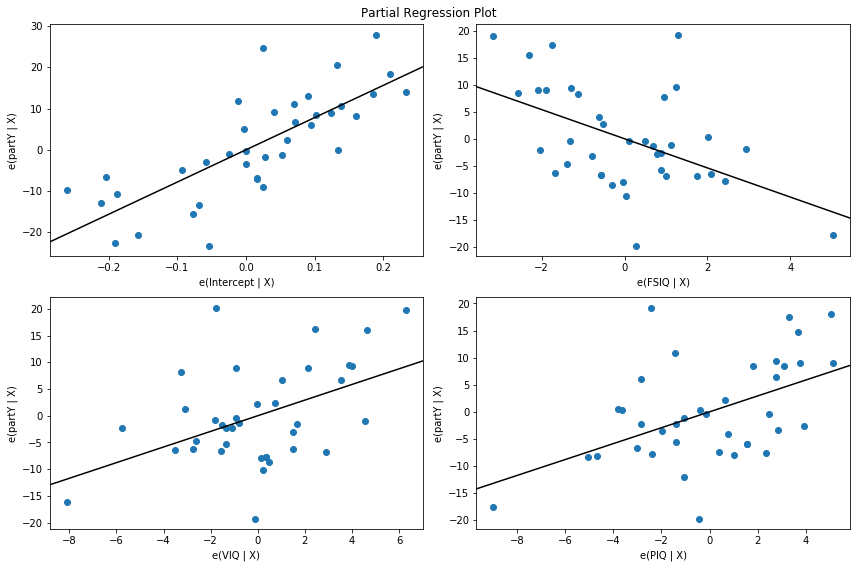

In [14]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model_partY, fig=fig)
#https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

#### Plot the residuals

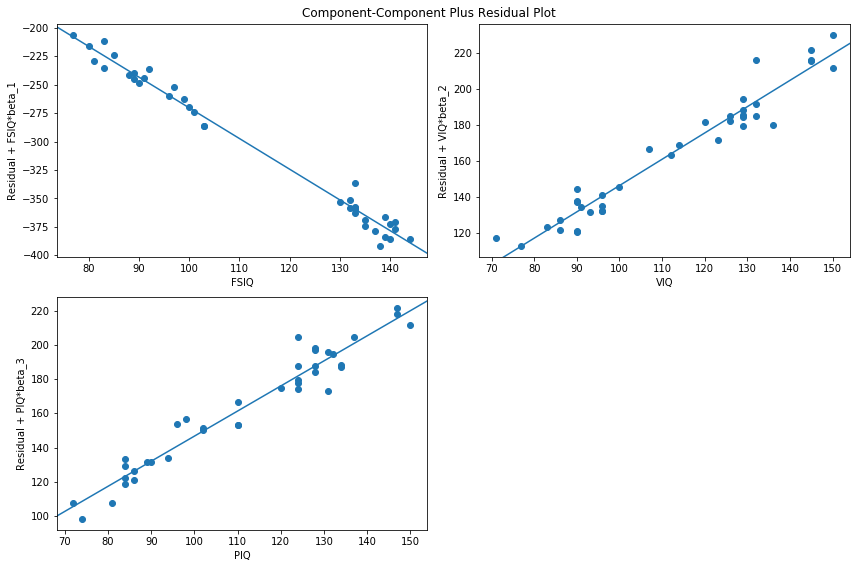

In [21]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_ccpr_grid(model_partY, fig=fig)

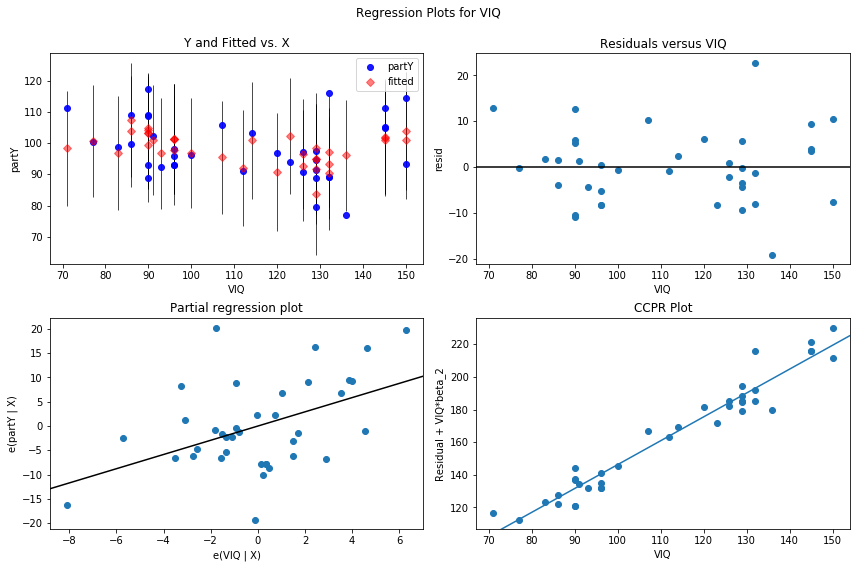

In [23]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_partY, "VIQ", fig=fig)

### Regression model with variable partY2

In [15]:
#############################################################
# Multilinear regression model, calculating fit, P-values,
# confidence intervals etc.

# Fit the model
model_partY2 = ols('partY2 ~ FSIQ + VIQ + PIQ', data).fit()

# Print the summary
print(model_partY2.summary())

                            OLS Regression Results                            
Dep. Variable:                 partY2   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                    0.3932
Date:                Fri, 29 May 2020   Prob (F-statistic):              0.759
Time:                        20:44:22   Log-Likelihood:                -145.99
No. Observations:                  38   AIC:                             300.0
Df Residuals:                      34   BIC:                             306.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    112.0505     15.534      7.213      0.0

Here, we can observe totally different p-values, when the combination of the variables FSIQ, VIQ and PIQ are set to predict partY2